<!-- You will be using this Level.fyi data to estimate salary for a position as of today or a future timeframe. 

Build a linear regression model to predict a salary for a given position.
Compute RMSE of your model.
Predictions:
How much you would get if you accept an offer from X company based on number of experiences and location?
How much you will be getting after Y years joining to X company? -->

In [1]:
#import statements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.8.0


In [3]:
filepath = "/Users/pranika/Desktop/SJSU-SEM2/CMPE255/Assignment1/Levels_Fyi_Salary_Data.csv"

In [4]:
df = pd.read_csv(filepath)
df= df.rename(columns=str.lower)
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,race_hispanic,race,education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [6]:
print("Shape of the df",df.shape)

Shape of the df (62642, 29)


In [7]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rownumber,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,race_asian,race_white,race_two_or_more,race_black,race_hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Check duplicate values
df.duplicated().sum()

0

In [9]:
#Count Nulls
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rownumber                      0
masters_degree                 0
bachelors_degree               0
doctorate_degree               0
highschool                     0
some_college                   0
race_asian                     0
race_white                     0
race_two_or_more               0
race_black                     0
race_hispanic                  0
race                       40215
education                  32272
dtype: int64

In [10]:
#NULL VALUES IN - 
#gender
#otherdetails
#race
#education
#level

In [11]:
cat_cols = df.select_dtypes(["object"]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode().values[0], inplace=True)

In [12]:
#the above mentioned data fill removes all the null values
#Count Nulls
df.isna().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      2
rownumber                  0
masters_degree             0
bachelors_degree           0
doctorate_degree           0
highschool                 0
some_college               0
race_asian                 0
race_white                 0
race_two_or_more           0
race_black                 0
race_hispanic              0
race                       0
education                  0
dtype: int64

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df['timestamp'] [:10]

0   2017-06-07 11:33:27
1   2017-06-10 17:11:29
2   2017-06-11 14:53:57
3   2017-06-17 00:23:14
4   2017-06-20 10:58:51
5   2017-06-21 17:27:47
6   2017-06-22 12:37:51
7   2017-06-22 13:55:26
8   2017-06-22 23:08:16
9   2017-06-26 21:25:45
Name: timestamp, dtype: datetime64[ns]

In [16]:
#creating new date column 
df['date'] = df['timestamp'].apply(lambda x: x.date())

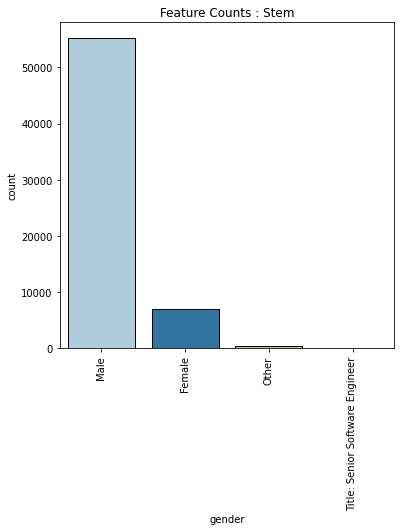

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = 'gender', palette="Paired",edgecolor="black")
plt.title('Feature Counts : Stem')
plt.xticks(rotation=90);

Text(0.5, 0, 'Location')

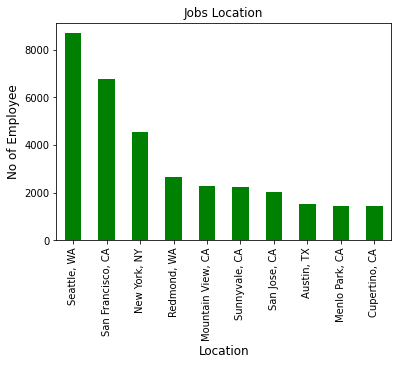

In [20]:
plt.figure(figsize=(6,4))
a=df["location"].value_counts()[:10].plot.bar(title='Jobs Location', color='green')
a.set_ylabel('No of Employee', size=12)
a.set_xlabel('Location', size=12)

Text(0, 0.5, 'Count')

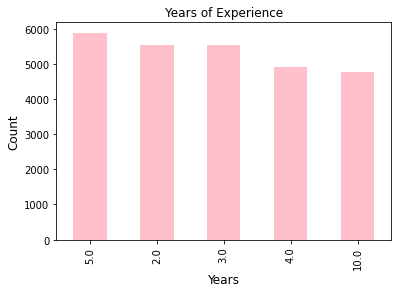

In [21]:
plt.figure(figsize=(6,4))
a = df["yearsofexperience"].value_counts()[:10].plot.bar(title='Years of Experience', color='pink');
a.set_xlabel('Years', size=12)
a.set_ylabel('Count', size=12)

In [23]:
df_title=pd.DataFrame(df['title'],columns=['title','frequency'])
df_title['frequency']=1
df_title=df_title.groupby('title').sum()
df_title

,frequency
title,
Business Analyst,885
Data Scientist,2578
Hardware Engineer,2200
Human Resources,364
Management Consultant,976
Marketing,710
Mechanical Engineer,490
Product Designer,1516
Product Manager,4673


In [24]:
edu_df=pd.DataFrame(df['education'],columns=['education','count'])
edu_df['count']=1
edu_df=edu_df.groupby('education').sum()
edu_df.reset_index(inplace=True)
edu_df.sort_values('count',ascending=True,inplace=True)
edu_df

,education,count
1,Highschool,320
4,Some College,355
3,PhD,1703
0,Bachelor's Degree,12601
2,Master's Degree,47663


In [25]:
df_perks = df.groupby(["totalyearlycompensation","yearsofexperience"])[["bonus","basesalary","stockgrantvalue"]].sum().reset_index()
df_perks.head()

,totalyearlycompensation,yearsofexperience,bonus,basesalary,stockgrantvalue
0,10000,0.0,12000.0,109000.0,2000.0
1,10000,1.0,7000.0,65000.0,0.0
2,10000,2.0,11000.0,111000.0,2000.0
3,10000,3.0,2000.0,89000.0,4000.0
4,10000,4.0,1000.0,47000.0,1000.0


Correlation Matrix

<AxesSubplot:>

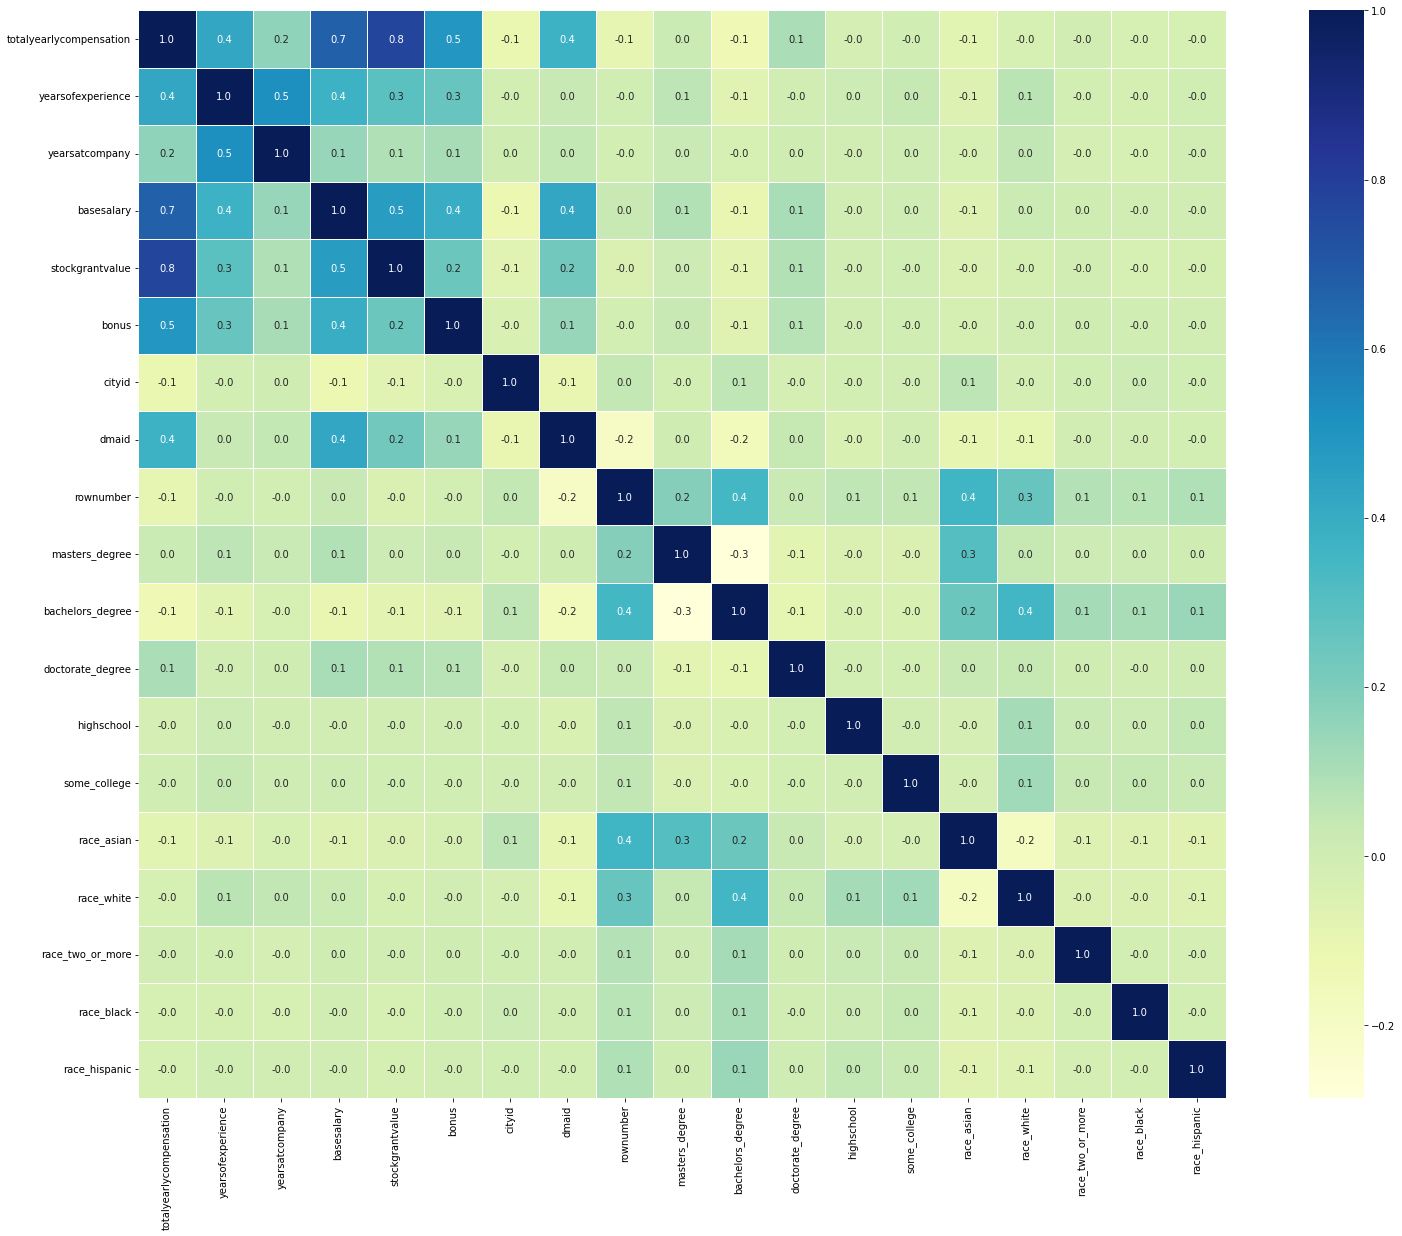

In [26]:
correlation = df.corr()
plt.subplots(figsize=(30,20))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ,linewidths=.5,cmap="YlGnBu")

<AxesSubplot:title={'center':'Correlation with Default'}>

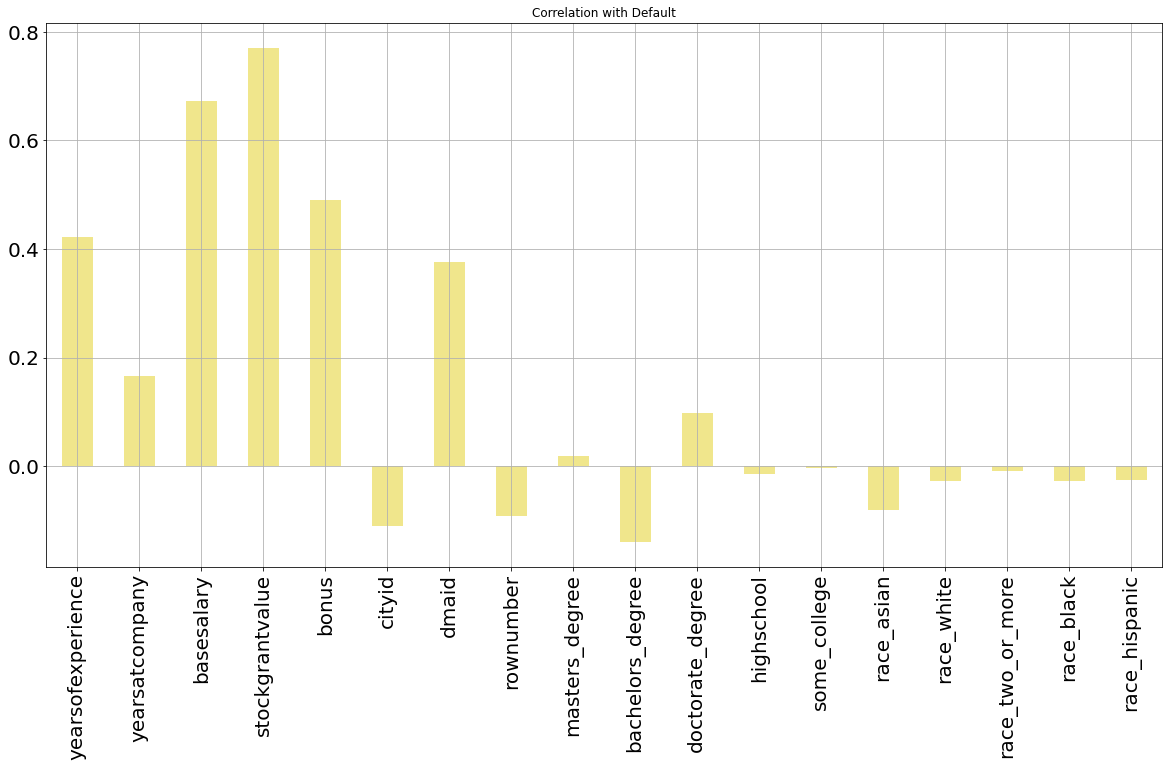

In [27]:
X = df.drop(['totalyearlycompensation'],axis=1)
X.corrwith(df['totalyearlycompensation']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True , color ='khaki')

In [28]:
len(df.columns)

30

#Models

In [29]:
#processing categorical variables

categorical_df=df[['location']]
categorical_df.shape
categorical_df["location"] = df.groupby(['location'], sort=False).ngroup()


In [30]:
#processing numerical variables

numerical_df = df[["yearsofexperience","totalyearlycompensation"]]

In [31]:
normalizer = tf.keras.layers.Normalization(axis=-1)
first = np.array(numerical_df[:1])
norm_num_df = normalizer(numerical_df).numpy()
norm_num_df = pd.DataFrame(norm_num_df)

2022-03-11 23:36:45.397687: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [32]:
norm_num_df

,0,1
0,1.5,127000.0
1,5.0,100000.0
2,8.0,310000.0
3,7.0,372000.0
4,5.0,157000.0
...,...,...
62637,10.0,327000.0
62638,2.0,237000.0
62639,14.0,220000.0
62640,8.0,280000.0


In [33]:
combined_after_manipulation = pd.concat([categorical_df,norm_num_df], axis=1,  ignore_index=True)
print(combined_after_manipulation.isna().sum())

0    0
1    0
2    0
dtype: int64


In [34]:
x_train = combined_after_manipulation.sample(frac=0.70, random_state=0)
x_test = combined_after_manipulation.drop(x_train.index)
x_train.shape

(43849, 3)

In [35]:
x_train = x_train.rename(columns = {0:'location',1:"yearsofexperience",2:"totalcompensation"})
x_train.shape

(43849, 3)

In [36]:
x_test = x_test.rename(columns = {0:'location',1:"yearsofexperience",2:"totalcompensation"})
x_test.shape

(18793, 3)

In [37]:
y_train = x_train.pop('totalcompensation')
y_test = x_test.pop('totalcompensation')

In [38]:

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [39]:
y_train_val = linear_model.predict(x_train)
linear_model.layers[1].kernel
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')


In [40]:
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.6560147],
       [ 1.4086789]], dtype=float32)>

In [41]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [42]:
%%time
model = linear_model.fit(x_train, y_train, epochs=150, verbose=0, validation_split = 0.2)

CPU times: user 3min 1s, sys: 26.4 s, total: 3min 28s
Wall time: 2min 39s


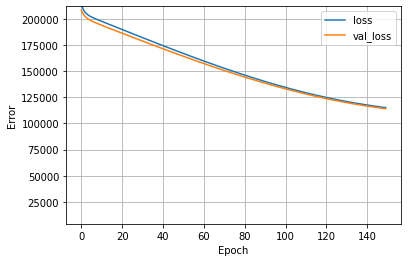

In [43]:
def plot_loss(model):
    plt.plot(model.history['loss'], label='loss')
    plt.plot(model.history['val_loss'], label='val_loss')
    plt.ylim([3000, 160000])
    plt.xlabel('Model Epochs (x-axis)')
    plt.ylabel('Error (y-axis)')
    plt.legend()
    plt.grid(True)
    
plot_loss(model)

In [44]:
y_test_val = linear_model.predict(x_test)
result = []
for y in y_test_val:
    result.append(y[0])
result = np.array(result)
print("predicted result array", result)

predicted result array [140463.39 148223.31 264575.97 ... 218291.34  47344.61 171503.  ]


In [45]:
def compute_rmse(train,preds):
    total_len = len(train)
    difference = np.subtract(train,preds)
    return np.sqrt((np.dot(difference,difference))/total_len)

rmse = compute_rmse(y_test,result)
print("The computed RMSE Value = ", rmse )

The computed RMSE Value =  154048.26542897642


# How much you would get if you accept an offer for a position from X company based on number of experiences and location?

In [46]:
#processing categorical variables

categorical_df=df[['location','company']]
print(categorical_df.shape)
categorical_df["company"] = df.groupby(['company'], sort=False).ngroup()
categorical_df["location"] = df.groupby(['location'], sort=False).ngroup()


(62642, 2)


In [47]:
# defining the y variable
y = df['totalyearlycompensation']
print("y.shape", y.shape)

y.shape (62642,)


In [48]:
# defining the y variable
y = df['totalyearlycompensation']
print("y.shape", y.shape)

y.shape (62642,)


In [49]:
#processing numerical variables

numerical_df = df[["yearsofexperience","totalyearlycompensation"]]

In [50]:
normalizer = tf.keras.layers.Normalization(axis=-1)
first = np.array(numerical_df[:1])
norm_num_df = normalizer(numerical_df).numpy()
norm_num_df = pd.DataFrame(norm_num_df)

In [51]:
norm_num_df

,0,1
0,1.5,127000.0
1,5.0,100000.0
2,8.0,310000.0
3,7.0,372000.0
4,5.0,157000.0
...,...,...
62637,10.0,327000.0
62638,2.0,237000.0
62639,14.0,220000.0
62640,8.0,280000.0


In [52]:
combined_after_manipulation = pd.concat([categorical_df,norm_num_df], axis=1,  ignore_index=True)
print(combined_after_manipulation.isna().sum())

0    0
1    0
2    0
3    0
dtype: int64


In [53]:
x_train = combined_after_manipulation.sample(frac=0.70, random_state=0)
x_test = combined_after_manipulation.drop(x_train.index)
x_train.shape

(43849, 4)

In [54]:
x_train

,0,1,2,3
44732,10,309,3.0,177000.0
52923,19,14,7.0,90000.0
38583,18,299,17.0,536000.0
51072,524,1565,20.0,166000.0
3455,2,6,10.0,307000.0
...,...,...,...,...
24261,5,4,2.0,240000.0
1904,4,9,3.0,266000.0
3655,70,61,2.0,105000.0
58640,27,41,5.0,150000.0


In [55]:
x_train = x_train.rename(columns = {0:'location',1:"company",2:"yearsofexperience",3:"totalcompensation"})
x_train.shape

(43849, 4)

In [56]:
x_test = x_test.rename(columns = {0:'location',1:"company",2:"yearsofexperience",3:"totalcompensation"})
x_test.shape

(18793, 4)

In [57]:
y_train = x_train.pop('totalcompensation')
y_test = x_test.pop('totalcompensation')

In [58]:
y_train.shape

(43849,)

In [59]:
y_test.shape

(18793,)

In [75]:

train_df = df.iloc[: , :-19]
train_df['location'] = df.groupby(['location'], sort=False).ngroup()
train_df['company'] = df.groupby(['company'], sort=False).ngroup()
temp = train_df[['yearsofexperience','location','company','totalyearlycompensation']]


In [76]:
temp

,yearsofexperience,location,company,totalyearlycompensation
0,1.5,0,0,127000
1,5.0,1,1,100000
2,8.0,2,2,310000
3,7.0,3,3,372000
4,5.0,4,4,157000
...,...,...,...,...
62637,10.0,2,9,327000
62638,2.0,5,4,237000
62639,14.0,2,586,220000
62640,8.0,1,5,280000


In [86]:
x_train = temp.sample(frac=0.75, random_state=0)
x_test = temp.drop(x_train.index)

In [89]:
y_train = x_train.pop('totalyearlycompensation')
y_test = x_test.pop('totalyearlycompensation')

In [90]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [91]:
linear_model = tf.keras.Sequential([normalizer, layers.Dense(units=1)])

In [92]:
y_train_val = linear_model.predict(x_train)

In [93]:
linear_model.layers[1].kernel

linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')

In [95]:
%%time
model = linear_model.fit(x_train, y_train, epochs=150, verbose=0, validation_split = 0.2)

CPU times: user 3min 52s, sys: 34.6 s, total: 4min 26s
Wall time: 5min 9s


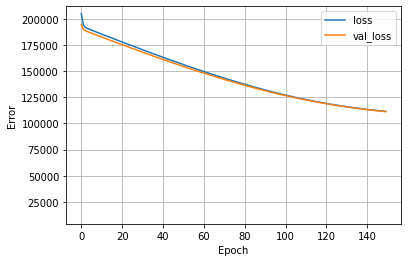

In [96]:
def plot_loss(model):
    plt.plot(model.history['loss'], label='loss')
    plt.plot(model.history['val_loss'], label='val_loss')
    plt.ylim([3000, 160000])
    plt.xlabel('Model Epochs (x-axis)')
    plt.ylabel('Error (y-axis)')
    plt.legend()
    plt.grid(True)
    
plot_loss(model)

In [97]:
y_test_val = linear_model.predict(x_test)
result = []
for y in y_test_val:
    result.append(y[0])
result = np.array(result)
print("predicted result array", result)

predicted result array [154298.14  275208.7    97807.664 ...  17275.807  33362.06   50122.594]


In [98]:
def compute_rmse(train,preds):
    total_len = len(train)
    difference = np.subtract(train,preds)
    return np.sqrt((np.dot(difference,difference))/total_len)

rmse = compute_rmse(y_test,result)
print("The computed RMSE Value = ", rmse )

The computed RMSE Value =  147547.16731538836


# How much you will be getting for a position after Y years joining to X company?

In [99]:
#processing categorical variables

categorical_df=df[['company']]
categorical_df.shape
categorical_df["company"] = df.groupby(['company'], sort=False).ngroup()


In [100]:
#processing numerical variables

numerical_df = df[["yearsatcompany","totalyearlycompensation"]]

In [101]:
normalizer = tf.keras.layers.Normalization(axis=-1)
first = np.array(numerical_df[:1])
norm_num_df = normalizer(numerical_df).numpy()
norm_num_df = pd.DataFrame(norm_num_df)

In [103]:
combined_after_manipulation = pd.concat([categorical_df,norm_num_df], axis=1,  ignore_index=True)
print(combined_after_manipulation.isna().sum())

0    0
1    0
2    0
dtype: int64


In [104]:
x_train = combined_after_manipulation.sample(frac=0.70, random_state=0)
x_test = combined_after_manipulation.drop(x_train.index)
x_train.shape

(43849, 3)

In [105]:
x_train = x_train.rename(columns = {0:'company',1:"yearsatcompany",2:"totalcompensation"})
x_train.shape

(43849, 3)

In [106]:
x_test = x_test.rename(columns = {0:'company',1:"yearsatcompany",2:"totalcompensation"})
x_test.shape

(18793, 3)

In [107]:
y_train = x_train.pop('totalcompensation')
y_test = x_test.pop('totalcompensation')

In [108]:
linear_model = tf.keras.Sequential([normalizer,layers.Dense(units=1)])
y_train_val = linear_model.predict(x_train)
linear_model.layers[1].kernel
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [110]:
linear_model.layers[1].kernel

<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.2902316],
       [-0.9590839]], dtype=float32)>

In [118]:
%%time
model = linear_model.fit(x_train, y_train, epochs=150, verbose=0, validation_split = 0.2)

CPU times: user 4min 15s, sys: 38.3 s, total: 4min 54s
Wall time: 4min 23s


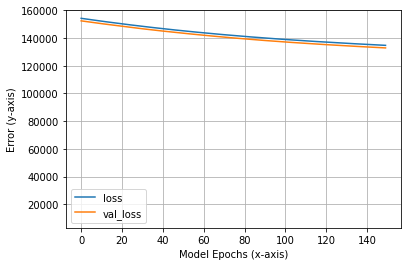

In [129]:
def plot_loss(model):
    plt.plot(model.history['loss'], label='loss')
    plt.plot(model.history['val_loss'], label='val_loss')
    plt.ylim([3000, 160000])
    plt.xlabel('Model Epochs (x-axis)')
    plt.ylabel('Error (y-axis)')
    plt.legend()
    plt.grid(True)
    
plot_loss(model)

In [130]:
pred_vals = []
y_test_val = linear_model.predict(x_test)
for y in y_test_val:
    pred_vals.append(y[0])
pred_vals = np.array(pred_vals)
print("predicted result array", pred_vals)

predicted result array [ 32425.395 259212.47  112628.52  ... 112698.55   86664.39   59579.906]


In [131]:
def compute_rmse(train,preds):
    total_len = len(train)
    difference = np.subtract(train,preds)
    return np.sqrt((np.dot(difference,difference))/total_len)

rmse = compute_rmse(y_test,pred_vals)
print("The computed RMSE Value = ", rmse )

The computed RMSE Value =  181414.61089826917
